In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart1.csv', 'sample_data']


In [ ]:
dataset = pd.read_csv("/content/heart1.csv")

In [ ]:
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
dataset.dropna()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
dataset.shape

(1025, 14)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 1 = normal; 2 = fixed defect; 3 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 1 = normal; 2 = fixed defect; 3 = reversable defect


CHECKING DATA

In [ ]:

dataset.drop(dataset[dataset['sex'] > 1].index, inplace = True)

In [ ]:
dataset.shape

(1025, 14)

In [ ]:
dataset.drop(dataset[dataset['age'] > 100].index, inplace = True)
dataset.shape

(1025, 14)

In [ ]:
dataset.drop(dataset[dataset['cp'] > 3].index, inplace = True)
dataset.shape

(1025, 14)

In [ ]:
dataset.drop(dataset[dataset['restecg'] > 2].index, inplace = True)
dataset.shape

(1025, 14)

In [ ]:
dataset.drop(dataset[dataset['fbs'] > 1].index, inplace = True)
dataset.shape

(1025, 14)

In [ ]:
dataset.drop(dataset[dataset['exang'] > 1].index, inplace = True)
dataset.shape

(1025, 14)

In [ ]:
dataset.drop(dataset[dataset['ca'] > 3].index, inplace = True)
dataset.shape

(1007, 14)

In [ ]:
dataset.drop(dataset[dataset['slope'] > 2].index, inplace = True)
dataset.shape

(1007, 14)

In [ ]:
dataset.drop(dataset[dataset['thal'] > 2].index, inplace = True)
dataset.shape

(604, 14)

**Exploratory Data Analysis (EDA)**

FEATURE 'TARGET'

1    425
0    179
Name: target, dtype: int64


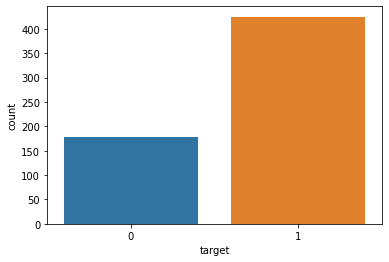

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2))+"%")
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2))+"%")

Percentage of patience without heart problems: 59.08%
Percentage of patience with heart problems: 140.26%


FEATURE 'AGE'

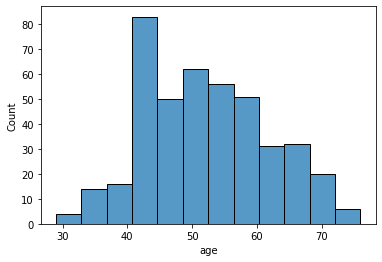

In [ ]:
sns.histplot(dataset['age'][dataset['target']==1])

FEATURE 'BLOOD PRESSURE'

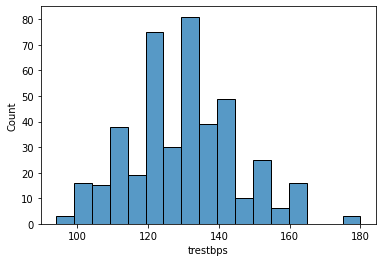

In [ ]:
sns.histplot(dataset['trestbps'][dataset['target']==1])

FEATURE 'CHOLESTEROL'

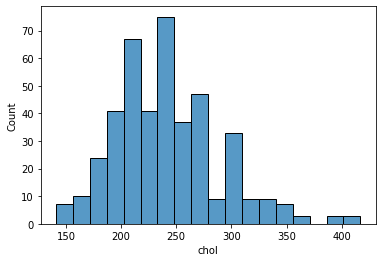

In [ ]:
sns.histplot(dataset['chol'][dataset['target']==1])

FEATURE 'Maximum heart rate achieved '

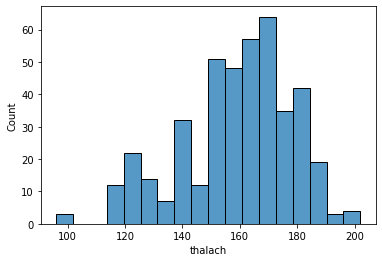

In [ ]:
sns.histplot(dataset['thalach'][dataset['target']==1])

FEATURE 'ST Depression '

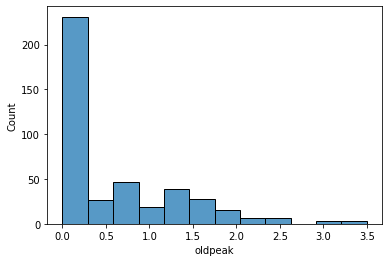

In [ ]:
sns.histplot(dataset['oldpeak'][dataset['target']==1])

FEATURE 'Gender'

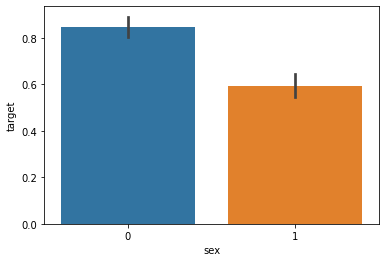

In [ ]:
sns.barplot(dataset["sex"],y)

FEATURE 'Chest pain '

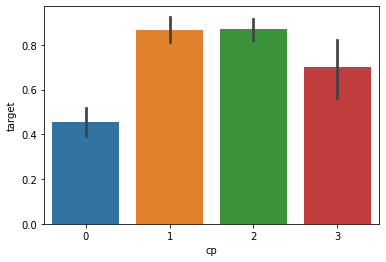

In [ ]:
sns.barplot(dataset["cp"],y)

FEATURE 'Fasting Blood Glucose Level '

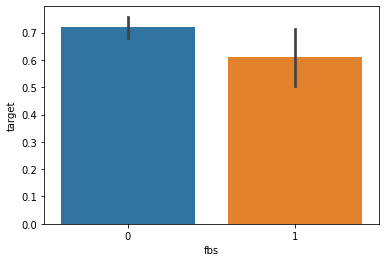

In [ ]:
sns.barplot(dataset["fbs"],y)

FEATURE 'Resting Electrocardiographic'

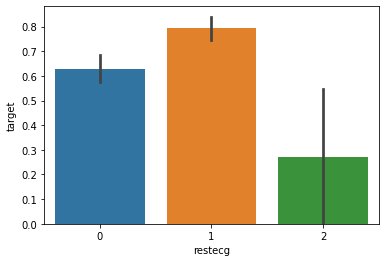

In [ ]:
sns.barplot(dataset["restecg"],y)

FEATURE 'Exercise induced angina '

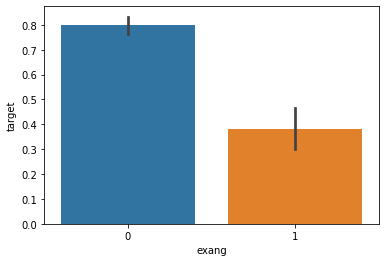

In [ ]:
sns.barplot(dataset["exang"],y)

FEATURE 'Slope of ST:'

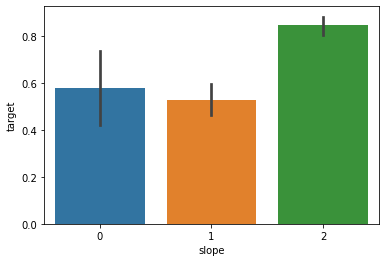

In [ ]:
sns.barplot(dataset["slope"],y)

FEATURE 'Number of vessels fluro '

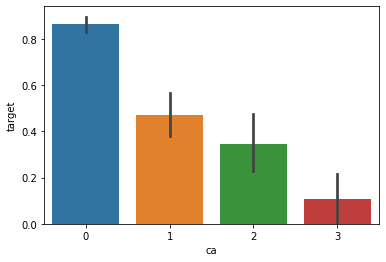

In [ ]:
sns.barplot(dataset["ca"],y)

FEATURE 'Thallium'

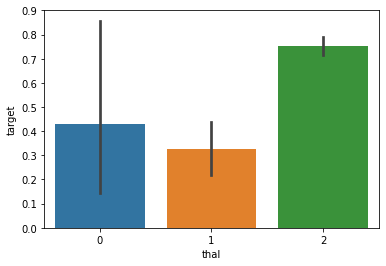

In [ ]:
sns.barplot(dataset["thal"],y)

In [ ]:
from sklearn.feature_selection import RFE 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x = dataset.iloc[:, 0:13] 
y = dataset.target


In [ ]:
mymodel = DecisionTreeClassifier(random_state=56)
mysearch = RFE(mymodel, n_features_to_select=12, step=1)
mysearch = mysearch.fit(x,y)
decision = mysearch.support_ 
decision = pd.DataFrame(decision, columns=["Decision"])
rank = mysearch.ranking_ 
rank = pd.DataFrame(rank, columns=["Rank"])
features = x.columns 
features = pd.DataFrame(features, columns= ["Features"])
myresult = features.join(decision) 
myresult = myresult.join(rank)
myresult

,Features,Decision,Rank
0,age,True,1
1,sex,True,1
2,cp,True,1
3,trestbps,True,1
4,chol,True,1
5,fbs,False,2
6,restecg,True,1
7,thalach,True,1
8,exang,True,1
9,oldpeak,True,1


**Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split

#predictors = mydata[["age","trestbps","ca","thalach","oldpeak",]]
#target = mydata["target"]

predictors = dataset[["age","cp","trestbps","chol","exang","slope","ca","thalach","oldpeak","thal","sex","restecg"]]
target = dataset["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
predictors = dataset[["age","cp","trestbps","chol","exang","slope","ca","thalach","oldpeak","thal","sex","restecg"]]
predictors

,age,cp,trestbps,chol,exang,slope,ca,thalach,oldpeak,thal,sex,restecg
0,52,0,125,212,0,2,2,168,1.0,3,1,1
1,53,0,140,203,1,0,0,155,3.1,3,1,0
2,70,0,145,174,1,0,0,125,2.6,3,1,1
3,61,0,148,203,0,2,1,161,0.0,3,1,1
4,62,0,138,294,0,1,3,106,1.9,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,1,2,0,164,0.0,2,1,1
1021,60,0,125,258,1,1,1,141,2.8,3,1,0
1022,47,0,110,275,1,1,1,118,1.0,2,1,0
1023,50,0,110,254,0,2,0,159,0.0,2,0,0


In [ ]:
X_train.shape


(483, 12)

In [ ]:
X_test.shape


(121, 12)

In [ ]:
Y_train.shape


(483,)

In [ ]:
Y_test.shape

(121,)

**MODEL FITTING**

In [ ]:
from sklearn.metrics import accuracy_score

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(121,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 90.08 %


**K NEAREST NEIGHBORS**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(121,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 73.55 %




**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(121,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 91.74 %


**NAVIE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 90.08 %


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


"""for x in range(100):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x"""
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


"""for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x"""
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(121,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


** COMPARING EACH MODEL'S SCORE**

In [ ]:
scores = [score_lr,score_knn,score_svm,score_nb,score_dt,score_rf]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Support Vector Machine","NAVIE BAYES","Decision Tree","Random Forest"] 

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 90.08 %
The accuracy score achieved using K-Nearest Neighbors is: 73.55 %
The accuracy score achieved using Support Vector Machine is: 91.74 %
The accuracy score achieved using NAVIE BAYES is: 90.08 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %


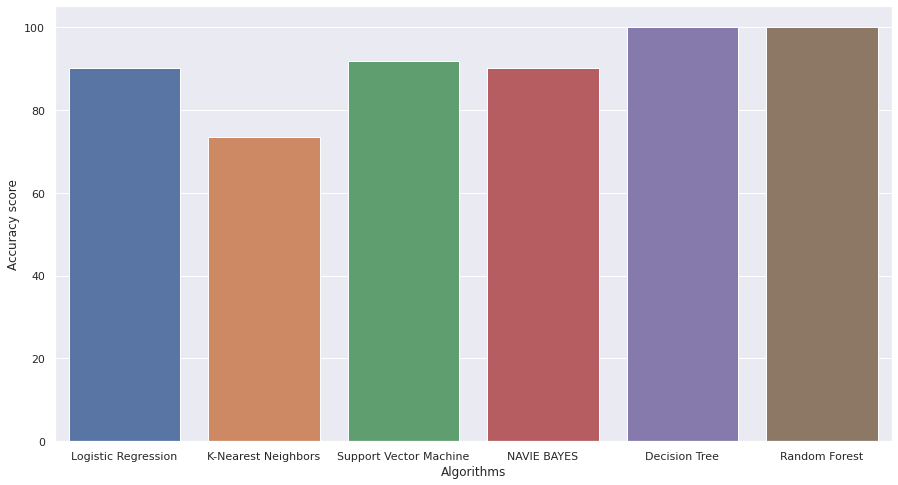

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)